In [1]:
# import pandas library 
import pandas as pd 

# Get the data 
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 

path = 'https://media.geeksforgeeks.org/wp-content/uploads/file.tsv'

df = pd.read_csv(path, sep='\t', names=column_names) 

# Check the head of the data 
df.head() 


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [2]:
# Check out all the movies and their respective IDs 
movie_titles = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/Movie_Id_Titles.csv') 
movie_titles.head() 


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
data = pd.merge(df, movie_titles, on='item_id') 
data.head() 


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [4]:
# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 


title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [5]:
# Calculate count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=False).head() 


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [6]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 

ratings.head() 


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.set_style('white') 
%matplotlib inline 


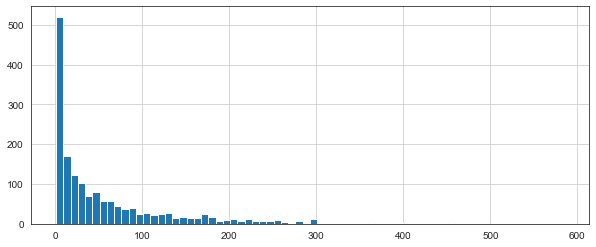

In [9]:
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 

ratings['num of ratings'].hist(bins = 70) 


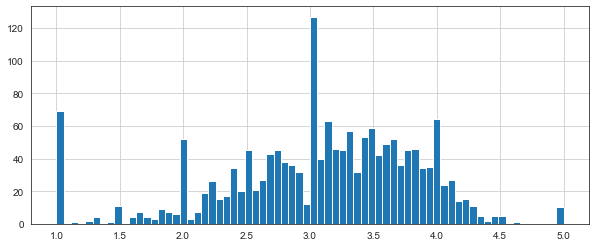

In [10]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 

ratings['rating'].hist(bins = 70) 


In [11]:
# Sorting values according to 
# the 'num of rating column' 
moviemat = data.pivot_table(index ='user_id', 
			columns ='title', values ='rating') 

moviemat.head() 

ratings.sort_values('num of ratings', ascending = False).head(10) 


,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [12]:
# analysing correlation with similar movies 
starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 

starwars_user_ratings.head() 


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [13]:
# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 

corr_starwars.head() 


c:\users\meena\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\meena\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [14]:
# Similar movies like starwars 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 

corr_starwars.head() 

corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [15]:
# Similar movies as of liarliar 
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 

corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head() 


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
